In [2]:
#Importing all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Importing the dataset and storing it in df
df = pd.read_csv(r"C:\Users\samik\Downloads\BigML_Dataset_5f50a62795a9306aa200003e.csv")

<span style = "font-size:30px;"> Initial Checks </span>

In [4]:
df.shape


(2832, 14)

In [5]:
df.head(5)


,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


In [6]:
df.columns

Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

In [7]:
df.isna().sum() #This shows that there are some null values in some of the columns. 
#df.tail(20)

Age                                                      0
Sex                                                      0
Race                                                     0
Marital status?                                          0
Education                                               58
Employement                                              0
Incomes                                                  0
How many books did you read during last 12months?        0
Read any printed books during last 12months?           390
Read any audiobooks during last 12months?              390
Read any e-books during last 12months?                 390
Last book you read, you…                               390
Do you happen to read any daily news or newspapers?      0
Do you happen to read any magazines or journals?         0
dtype: int64

In [8]:
df.dtypes

Age                                                     int64
Sex                                                    object
Race                                                   object
Marital status?                                        object
Education                                              object
Employement                                            object
Incomes                                                object
How many books did you read during last 12months?       int64
Read any printed books during last 12months?           object
Read any audiobooks during last 12months?              object
Read any e-books during last 12months?                 object
Last book you read, you…                               object
Do you happen to read any daily news or newspapers?    object
Do you happen to read any magazines or journals?       object
dtype: object

In [9]:
df.loc[df.duplicated(keep=False)] #two rows are duplicated.


,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
1021,65,Male,White,Married,College graduate,Retired,"$75,000 to under $100,000",12,Yes,No,Yes,Purchased the book,Yes,Yes
1023,65,Male,White,Married,College graduate,Retired,"$75,000 to under $100,000",12,Yes,No,Yes,Purchased the book,Yes,Yes


In [10]:
df = df.drop_duplicates(keep='first') 
df.shape
#Earlier, there were 2832 rows, now the one duplicated row deleted, so there are 2831 rows. 

(2831, 14)

In [11]:
df.columns
df['Race'].unique() #So, there are 8 categorization in the race column. 

array(['Refused', 'Native American/American Indian', 'Mixed race',
       'Asian or Pacific Islander', 'Black or African-American', 'White',
       'Don’t know', 'Other'], dtype=object)

In [12]:
df.columns
df['Marital status?'].unique() #so, there are 8 categorization in the Marital status. 

array(['Divorced', 'Married', 'Never been married', 'Widowed',
       'Don’t know', 'Living with a partner', 'Single', 'Separated'],
      dtype=object)

In [13]:
df.columns
df['Education'].unique() #so, there are six categories in the education, along with some null values.

array(['College graduate', 'High school graduate',
       'High school incomplete', 'Some college, no 4-year degree',
       'Post-graduate training/professional school after college',
       'Technical, trade or vocational school AFTER high school', nan,
       'Don’t know'], dtype=object)

In [14]:
df.columns
df['Employement'].unique() #So, there are eight categories here. 

array(['Retired', 'Employed full-time', 'Employed part-time',
       'Have own business/self-employed', 'Student', 'Other',
       'Not employed for pay', 'Disabled'], dtype=object)

<span style = "font-size:30px;"> Fixing quality issue in Incomes </span>
When we looked for unique values in the income categorization, we found that there are two categories for $100,000 to $150,000. The second category has an extra character '9' at the beginning, which makes it a completely different string. This needs to fixed using replace().

In [15]:
df.columns
df['Incomes'].unique(), #so, there are 10 categories here. 

(array(['$20,000 to under $30,000', 'Less than $10,000',
        '$40,000 to under $50,000', '$10,000 to under $20,000',
        '$50,000 to under $75,000', '$100,000 to under $150,000',
        '$75,000 to under $100,000', '9$100,000 to under $150,000',
        '$30,000 to under $40,000', 'Refused'], dtype=object),)

In [27]:
df['Incomes'] = df["Incomes"].replace("9$100,000 to under $150,000","$100,000 to under $150,000")
df['Incomes'].value_counts()

Incomes
$100,000 to under $150,000    742
$50,000 to under $75,000      394
$75,000 to under $100,000     315
Refused                       291
$30,000 to under $40,000      265
$20,000 to under $30,000      238
$10,000 to under $20,000      216
$40,000 to under $50,000      207
Less than $10,000             163
Name: count, dtype: int64

Now, we are making an assumption that among all the respondents, those who have not read a single book in past 12 months, we will not consider tham as a reader. Hence, taking only those respondennts into consideration who have read at least one book in past 12 months, and storing them in a new data frame, called df_readers. 


In [28]:
#Not all the respondents are readers. Those who have zero book read counts in the past 12 months will not be considered readers. 
df_readers = df.loc[df['How many books did you read during last 12months?']>0] #storing the readers data in a different df. 
df_readers

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,16,Female,White,Never been married,High school incomplete,Not employed for pay,"$30,000 to under $40,000",1,Yes,No,No,Purchased the book,No,No
2438,16,Female,White,Never been married,High school incomplete,Not employed for pay,"Less than $10,000",1,Yes,No,No,Borrowed the book from a library,No,No
2439,16,Male,White,Never been married,High school incomplete,Not employed for pay,"$100,000 to under $150,000",1,No,No,No,Got the book some other way,Yes,No
2440,16,Female,White,Never been married,High school incomplete,Employed part-time,"$100,000 to under $150,000",1,Yes,No,No,Borrowed the book from a friend or family member,No,Yes


<span style = "font-size:30px;"> Analysing Male and Female readers </span>
Women seems to read more than male. 

In [29]:
#Figuring out male and female readers:I first filtered respondents who read at least one book, then used value counts on gender to determine the male–female composition among readers.
gender_counts = df_readers['Sex'].value_counts()
print(f"Number of female readers: {gender_counts.get('Female', 0)}")
print(f"Number of male readers: {gender_counts.get('Male', 0)}")

Number of female readers: 1329
Number of male readers: 1112


<Figure size 300x200 with 0 Axes>

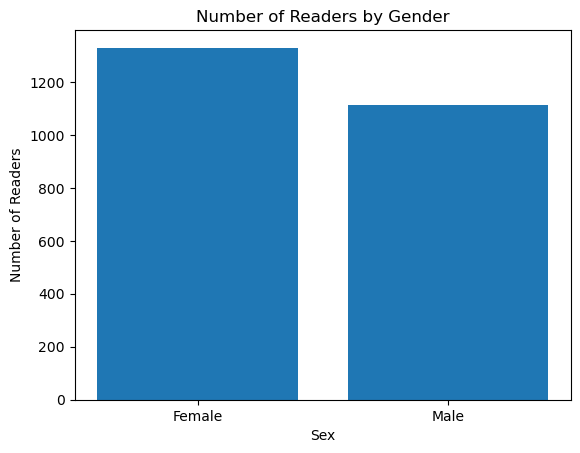

<Figure size 300x200 with 0 Axes>

In [30]:
#visual representation
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Sex')
plt.ylabel('Number of Readers')
plt.title('Number of Readers by Gender')
plt.figure(figsize = (3,2))


<span style = "font-size:30px;"> Why do Female tend to read more? </span>

Now I want to know why females read more. Reading frequency is influenced by employment type, retirement, and part-time vs full work. If more women in the datasets are retired or part-time employed, they may have more discretionary time for reading. 
1) Checked Employment Status gender wise: From the result, it can be seen that the number of women employed without pay is more than that of men, more than double. Also, among retired readers, females are more than males. In the part time as well as full-time employment, females are in larger numbers than males. These groups have more flexible schedules, typically, and are more likely to engage in leisure activities like reading. 

In [31]:
#Checking if employement status has anything to do with the result that females read more.
employment_gender = pd.crosstab(df_readers['Employement'],df_readers['Sex'])
employment_gender

Sex,Female,Male
Employement,,
Disabled,25,21
Employed full-time,502,587
Employed part-time,191,131
Have own business/self-employed,21,26
Not employed for pay,270,132
Other,12,1
Retired,291,209
Student,17,5


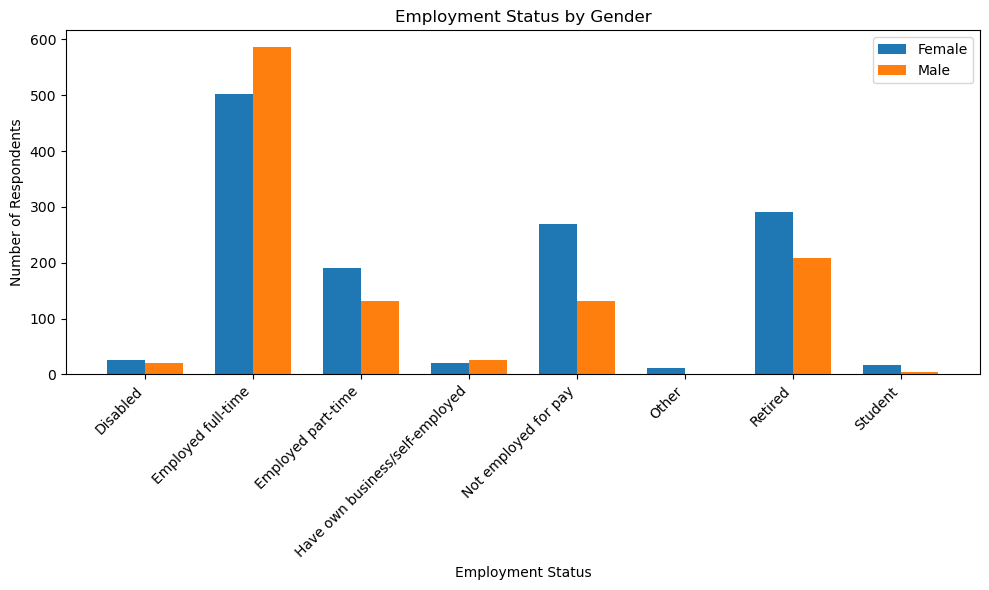

In [32]:
employment = employment_gender.index
female_counts = employment_gender["Female"]
male_counts = employment_gender["Male"]

x = np.arange(len(employment))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, female_counts, width, label="Female")
plt.bar(x + width/2, male_counts, width, label="Male")

plt.xlabel("Employment Status")
plt.ylabel("Number of Respondents")
plt.title("Employment Status by Gender")
plt.xticks(x, employment, rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()


<span style = "font-size:30px;"> Analysing Readers across different races </span>

First of all, we will see the number of respondents across different races. 

In [71]:
race_respondents_counts = df['Race'].value_counts()
race_respondents_counts
#race_percent = df['Race'].value_counts(normalize=True)*100
#print(round((race_percent['White']),2))

Race
White                              2216
Black or African-American           347
Asian or Pacific Islander            70
Mixed race                           63
Other                                58
Refused                              37
Native American/American Indian      31
Don’t know                            9
Name: count, dtype: int64

So, there are 7 races, and the white respondents have a clear dominance with 78.28% of total respondents. 

Now, I want to see the number of readers across different races. 

In [80]:
race_readers_counts = df_readers['Race'].value_counts()
race_readers_counts

Race
White                              1926
Black or African-American           282
Asian or Pacific Islander            62
Mixed race                           55
Other                                48
Refused                              35
Native American/American Indian      24
Don’t know                            9
Name: count, dtype: int64

From this table, it can be seen that the absolute number of white respondents who read is more than that of any other race. But we cannot conclude that white people read more. We will have to check the proportionate reading rate to come to any conclusion. So, now we have counts of respondents and counts of readers across different races. We will calculate the reader rate within each race. 

In [84]:
reader_percentage = (race_readers_counts/race_respondents_counts)*100
round(reader_percentage, 2)

Race
White                               86.91
Black or African-American           81.27
Asian or Pacific Islander           88.57
Mixed race                          87.30
Other                               82.76
Refused                             94.59
Native American/American Indian     77.42
Don’t know                         100.00
Name: count, dtype: float64

So, now we can see that the reading rate is highest for the Asian or Pacific Islander
race, followed by the Mixed race. Although, White respondents constitute the largest 
number of readers in absolute terms, the reading rate is higher for Asian or Pacific 
Islander. 

In [109]:
#df_readers.columns
#Race_Income_Table = pd.crosstab(df['Race'], df['Incomes'])
#Race_Income_Table

From this table, it can be seen that White respondents dominate almost every income 
bracket, especially in middle and higher income categories. However, this table does 
not mean White people read more because they earn more. The dataset has many more White
respondents, and they are also more represented in middle and higher income brackets, 
which are associated with higher reading levels.

<span style = "font-size:30px;"> Why Reading Rate is higher in Asian or Pacific Islander? </span>

<span style = "font-size:20px;"> Reason 1: Education distribution: Do Asians have higher representation in higher education categories than other races? </span>

In [108]:
education_distribution_race = round(pd.crosstab(df['Race'], df['Education'], normalize = 'index')*100, 1)
education_distribution_race

Education,College graduate,Don’t know,High school graduate,High school incomplete,Post-graduate training/professional school after college,"Some college, no 4-year degree","Technical, trade or vocational school AFTER high school"
Race,,,,,,,
Asian or Pacific Islander,38.6,1.4,8.6,5.7,22.9,21.4,1.4
Black or African-American,13.3,0.3,34.7,14.8,7.6,26.9,2.4
Don’t know,33.3,0.0,22.2,0.0,22.2,11.1,11.1
Mixed race,20.7,0.0,19.0,19.0,6.9,29.3,5.2
Native American/American Indian,6.5,3.2,38.7,6.5,12.9,32.3,0.0
Other,10.9,0.0,40.0,23.6,3.6,20.0,1.8
Refused,14.7,2.9,14.7,0.0,35.3,32.4,0.0
White,22.7,0.2,23.6,8.4,20.0,22.7,2.4


This table shows the percentage of all respondents who fall into each education category. This table in itself does not seem to be that much interpretative in answering our question. Let's total the college graduate, post-graduate, and some college, no 4-year degree, for each race, to make a single 'Higher education category'.

In [120]:
Higher_edu_col = ['College graduate', 'Post-graduate training/professional school after college', 'Some college, no 4-year degree']
Higher_edu_col #storing the required columns
education_distribution_race[Higher_edu_col].sum(axis = 1)

Race
Asian or Pacific Islander          82.9
Black or African-American          47.8
Don’t know                         66.6
Mixed race                         56.9
Native American/American Indian    51.7
Other                              34.5
Refused                            82.4
White                              65.4
dtype: float64

I grouped education categories into a composite ‘college or higher’ indicator by
summing college graduates, post-graduates, and respondents with some college education.
This allowed a consistent comparison of higher-education exposure across races. Asian or
Pacific Islander respondents have a much higher concentration in college-level 
education categories compared to other races. Hence, Asian respondents appear to read 
more because a much larger proportion of them have a college-level education

But how can we say that Higher Education leads to higher reading rate. If that is so, 
it must be true across all the races, not just Asian or Pacific Islander.

In [135]:
df["Is_Reader"] = df["How many books did you read during last 12months?"] > 0
Reading_rate_edu_race = round( pd.crosstab([df['Race'], df['Education']], df['Is_Reader'], normalize='index')*100, 2)
Reading_rate_edu_race



Is_Reader                                                                            False  \
Race                            Education                                                    
Asian or Pacific Islander       College graduate                                      0.00   
                                Don’t know                                          100.00   
                                High school graduate                                 33.33   
                                High school incomplete                               25.00   
                                Post-graduate training/professional school afte...   12.50   
                                Some college, no 4-year degree                       13.33   
                                Technical, trade or vocational school AFTER hig...    0.00   
Black or African-American       College graduate                                      6.82   
                                Don’t know                                            0.00   
                                High school graduate                                 21.74   
                                High school incomplete                               20.41   
                                Post-graduate training/professional school afte...    0.00   
                                Some college, no 4-year degree                       17.98   
                                Technical, trade or vocational school AFTER hig...   25.00   
Don’t know                      College graduate                                      0.00   
                                High school graduate                                  0.00   
                                Post-graduate training/professional school afte...    0.00   
                                Some college, no 4-year degree                        0.00   
                                Technical, trade or vocational school AFTER hig...    0.00   
Mixed race                      College graduate                                      8.33   
                                High school graduate                                 27.27   
                                High school incomplete                                9.09   
                                Post-graduate training/professional school afte...    0.00   
                                Some college, no 4-year degree                        5.88   
                                Technical, trade or vocational school AFTER hig...   33.33   
Native American/American Indian College graduate                                      0.00   
                                Don’t know                                          100.00   
                                High school graduate                                 25.00   
                                High school incomplete                                0.00   
                                Post-graduate training/professional school afte...    0.00   
                                Some college, no 4-year degree                       30.00   
Other                           College graduate                                      0.00   
                                High school graduate                                 18.18   
                                High school incomplete                                7.69   
                                Post-graduate training/professional school afte...    0.00   
                                Some college, no 4-year degree                       27.27   
                                Technical, trade or vocational school AFTER hig...    0.00   
Refused                         College graduate                                      0.00   
                                Don’t know                                            0.00   
                                High school graduate                                 20.00   
                                Post-graduate traini

From the above table, it can be seen that higher education is strongly associated with
higher reading particiaption across all racial groups.  

<span style = "font-size:20px;"> Reason 2: Education distribution: Asian respondents may be concentrated in middle–high income brackets / Higher income → better access to books & leisure reading  </span>

<span style = "font-size:20px;"> Reason 3: Employment Profile: If more Asian respondents are Employed part-time, Students, Retired, They have more discretionary time</span>